# Effects of Loan Characteristics on Loan Status
## Moses Omoghene Queen

## Investigation Overview


> In this investigation, I want to focus on the factors which affects a borrower's ability to pay back the loan, primarily the employment status. 

## Dataset Overview

>This dataset consists of stated monthly income, term, borrower apr, employment status, loan original amount and loan status. The orginal dataset contains 113,937 loans with 6 features. However, for my analysis, I created a sub file with only 104135 loans and 11 features after cleaning.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan=pd.read_csv('prosperLoanData.csv')
loan

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1


In [3]:
#Changing all column names to be lower case and removed the spacing
loan =loan.rename(columns = str.lower)

In [4]:
sub = ['borrowerapr','employmentstatus','statedmonthlyincome', 'loanstatus','term','loanoriginalamount']
loan_sub = loan[sub]
loan_sub.shape

(113937, 6)

In [5]:
#Dropping duplicates
loan_sub.drop_duplicates(inplace=True)

In [6]:
#Dropping null values
loan_sub.dropna(subset=['borrowerapr','employmentstatus'], inplace=True)

# Distribution of stated monthly income and the Loan original amount

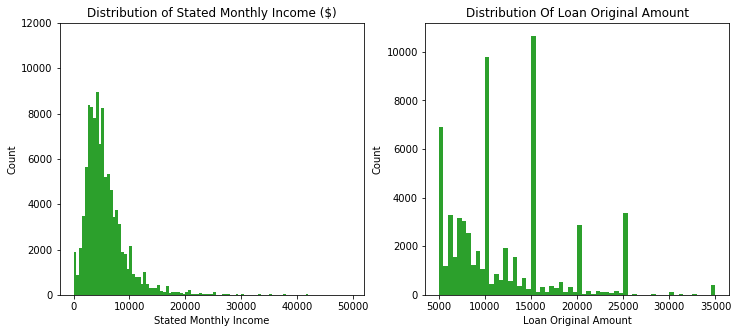

In [7]:
plt.figure(figsize=(12,5))
base_color=sb.color_palette()[2]
plt.subplot(1,2,1)
bins = np.arange(0, 50000, 500)
plt.hist(data = loan_sub, x = 'statedmonthlyincome', color=base_color,bins=bins)
plt.ylim(0,12000)
plt.xlabel('Stated Monthly Income')
plt.ylabel('Count')
plt.title('Distribution of Stated Monthly Income ($)');

plt.subplot(1,2,2)
bins = np.arange(5000, loan_sub['loanoriginalamount'].max()+500, 500)
plt.hist(data = loan_sub, x = 'loanoriginalamount', color=base_color,bins = bins);
plt.xlabel('Loan Original Amount')
plt.ylabel('Count')
plt.title('Distribution Of Loan Original Amount');

## Distribution of Employment status and Loan Terms

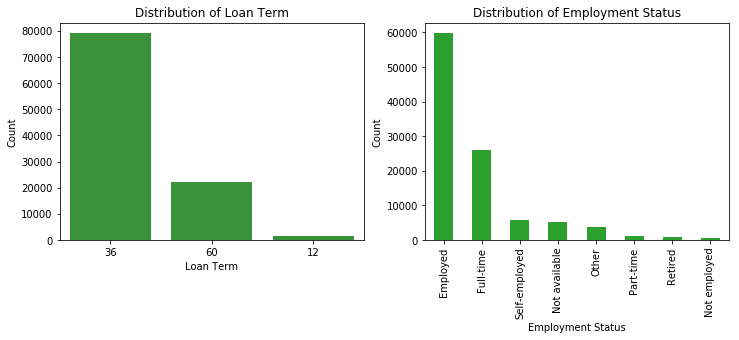

In [8]:
plt.figure(figsize=(12,4))
base_color = sb.color_palette()[2]
plt.subplot(1,2,1)
loan_term= loan_sub['term'].value_counts().index
sb.countplot(data=loan_sub, x='term', order=loan_term, color=base_color)
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.title('Distribution of Loan Term');

plt.subplot(1,2,2)
loan_sub['employmentstatus'].value_counts().plot(kind='bar',color = base_color)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Distribution of Employment Status')
plt.xticks(rotation=90);

## Loan Payment Status for the three Terms

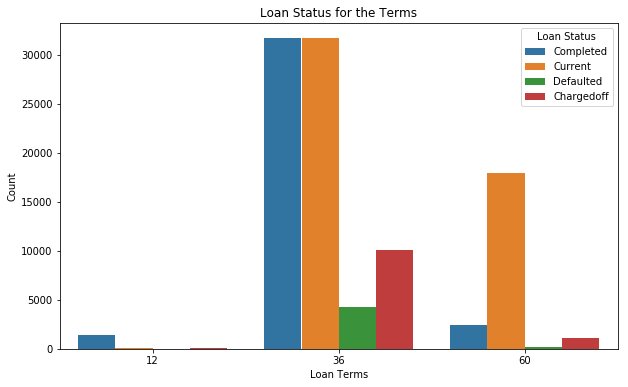

In [9]:
plt.figure(figsize=(10,6))
loan_status = loan_sub.loc[loan['loanstatus'].isin(['Completed', 'Current', 'Defaulted', 'Chargedoff'])]
sb.countplot(data=loan_status, x='term',hue='loanstatus')
plt.xlabel('Loan Terms')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.title('Loan Status for the Terms');

## Stated Monthly income by Employment status



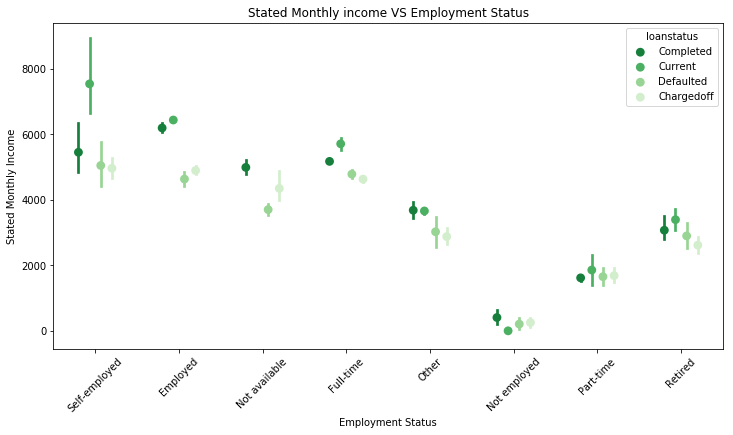

In [10]:
plt.figure(figsize=[12,6])
loan_status = loan_sub.loc[loan['loanstatus'].isin(['Completed', 'Current', 'Defaulted', 'Chargedoff'])]
sb.pointplot(data = loan_status, x = 'employmentstatus', y = 'statedmonthlyincome', hue = 'loanstatus',
           palette = 'Greens_r', linestyles = '', dodge = 0.4)
plt.title('Stated Monthly income VS Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Stated Monthly Income')
plt.xticks(rotation=45);

## Loan Term Vs Loan Amount

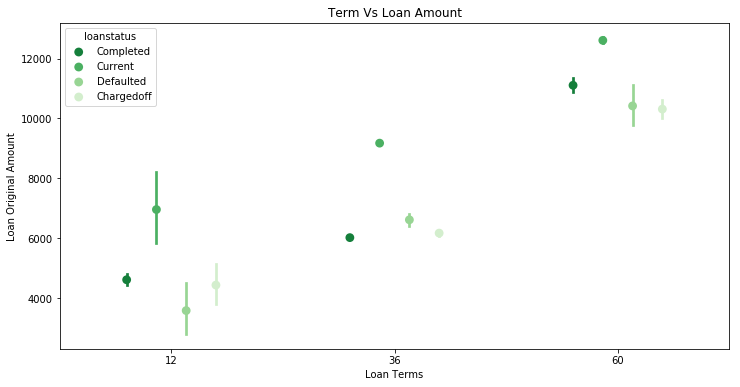

In [11]:
plt.figure(figsize=[12,6])
loan_status = loan_sub.loc[loan['loanstatus'].isin(['Completed', 'Current', 'Defaulted', 'Chargedoff'])]
sb.pointplot(data = loan_status, x = 'term', y = 'loanoriginalamount', hue = 'loanstatus',
           palette = 'Greens_r', linestyles = '', dodge = 0.4)
plt.xlabel('Loan Terms')
plt.ylabel('Loan Original Amount')
plt.title('Term Vs Loan Amount');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_2_Loan_Project.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_2_Loan_Project.ipynb to slides
[NbConvertApp] Writing 407086 bytes to Part_2_Loan_Project.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_2_Loan_Project.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: n